# EDA 04 & 05 - Feature Selection -I & II  Combined

## 1. Necessary Imports 

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import scipy.stats as s
import seaborn as sns

## 2. Reading dataset into CSV & Basic Data Description

### a) Reading Data

In [3]:
data=pd.read_csv("D:/FTI/Cohort 2 EDA/Lecture 4/Finance.csv")

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.shape

(45211, 17)

### b) Check the Data Types

In [6]:
data.dtypes
    

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## 3.  Check Missing Data or Null Values

In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## 4. Check for Data Quality Issues

### a) For categorical attributes you can ispect the unique values

You can display all the unique values and based on domain kbowledge can decide if incrrect data exists or not.

In [8]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

If you do not have the doamin knowledge , then value counts may give you an idea about the possible incorrect values

In [9]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

You can also use describe() to get a bit more information about the feature under consideration

In [10]:
data['job'].describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

### b) For numeric attributes you can inspect all the posible set of values

If you have a domain knowledge , the minimum and maximum values can spot if incorrect data is present or not

In [11]:
data['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

If you do nat have the domain knowledge , the boxplot may give you some clue about the presence of possibly incorrect values. We call them as outliers. Outliers may be real or due to data collection problems.

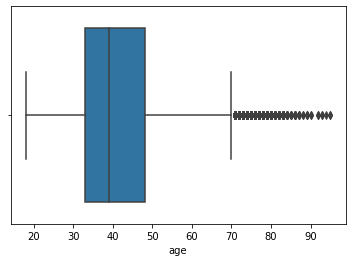

In [12]:
sns.boxplot(x=data['age'], data=data)

## 5. Feature Selection Based on Filter Methods

### a) Using Chi Square to test association between categorical attributes

The class variable is Y which is object type. So we can use Chi Square to check the association between 
all other object types and the class.The variables having strong association can be chosen as the features 
for machine learning algorithm.

Lets perform a chi-square test of independence for 'default' and class variable 'y'

In [13]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [14]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [15]:
ov=pd.crosstab(data['default'],data['y'])

In [16]:
ov

y,no,yes
default,,
no,39159,5237
yes,763,52


In [19]:
b=stats.chi2_contingency(ov)

In [20]:
b

(22.20224995571685,
 2.4538606753508344e-06,
 1,
 array([[39202.34261574,  5193.65738426],
        [  719.65738426,    95.34261574]]))

Here b is a tuple containing an immutable sequence of python objects . Here it contains four objcets . 
b[0] contains the value of chi2 statistic , b[1] contains the p-value of the test , b[2] contains the 
degree of freedom and b[3] contains the expected frequencies.

In [21]:
b[0]

22.20224995571685

In [22]:
b[1] 

2.4538606753508344e-06

In [23]:
b[2]

1

In [24]:
b[3]

array([[39202.34261574,  5193.65738426],
       [  719.65738426,    95.34261574]])

Lets create a custom function to peform chi-square test of independence 

In [25]:
def test_dependency(data,f1,f2,alpha):
    ov=pd.crosstab(data[f1],data[f2])
    b=s.chi2_contingency(ov)
    chi2_statistic=b[0]
    p_value=b[1]
    dof=b[2]
    critical_value=s.chi2.ppf(q=1-alpha, df=dof)
    ## ppf stands for percent point function . It takes two parameters confidence interval and degrees of freedom. 
    ##It returns the critical value. ppf is the inverse of cumulative distribution function.
    ## https://www.itl.nist.gov/div898/handbook/eda/section3/eda362.htm
    print('Significance level: ',alpha)
    print('Degree of Freedom: ',dof)
    print('chi-square statistic:',chi2_statistic)
    print('critical_value:',critical_value)
    print('p-value:',p_value)
    
    if chi2_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    
    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    


In [28]:
test_dependency(data,'default','y',0.05)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 22.20224995571685
critical_value: 3.841458820694124
p-value: 2.4538606753508344e-06
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [29]:
test_dependency(data,'education','y',0.05)

Significance level:  0.05
Degree of Freedom:  3
chi-square statistic: 238.92350616407606
critical_value: 7.814727903251179
p-value: 1.6266562124072994e-51
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


#### Selecting k-Best Features based on Chi-Square Test 

We will be using SelectKBest( )which takes numeric data only . So for that we have to encode all the categorical.We will be using mannual encoding for ordinal features whereas label encoding for all other nominal features.

#### Encoding Ordinal Features

In [30]:
ordinal_list=['education']
data['education'] = data['education'].replace(['primary','secondary','tertiary','unknown'],[1,2,3,2])


In [31]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,2,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,2,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,2,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Encoding Nominal Features

In [32]:
nominal_list = []
for i in data.columns.tolist():
    if (data[i].dtype=='object') and (i not in ordinal_list):
        nominal_list.append(i)
print (nominal_list)        
print('Number of nominal features:', str(len(nominal_list)))


['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Number of nominal features: 9


In [33]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for column in nominal_list:
    data[column]=encoder.fit_transform(data[column])


In [34]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,3,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,2,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,2,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,2,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,2,0,1,0,0,2,5,8,198,1,-1,0,3,0


#### Combining ordinal and nominal features after encoding 

In [35]:
ordinal_data=data[ordinal_list]
nominal_data=data[nominal_list]
categorical_data = pd.concat([ordinal_data,nominal_data], axis=1)

In [36]:
categorical_data

,education,job,marital,default,housing,loan,contact,month,poutcome,y
0,3,4,1,0,1,0,2,8,3,0
1,2,9,2,0,1,0,2,8,3,0
2,2,2,1,0,1,1,2,8,3,0
3,2,1,1,0,1,0,2,8,3,0
4,2,11,2,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...
45206,3,9,1,0,0,0,0,9,3,1
45207,1,5,0,0,0,0,0,9,3,1
45208,2,5,1,0,0,0,0,9,2,1
45209,2,1,1,0,0,0,1,9,3,0


#### Selecting K Best Features based on Chi-Square Test 

In [37]:
X=categorical_data.drop('y',axis=1)
Y=categorical_data['y']
chi_scores = chi2(X,Y)

In [38]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = True , inplace = True)
chi2_values=pd.Series(chi_scores[0],index = X.columns)
chi2_values.sort_values(ascending = False , inplace = True)

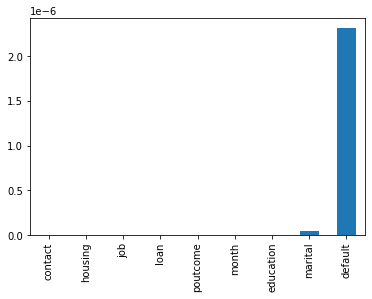

In [39]:
p_values.plot.bar()

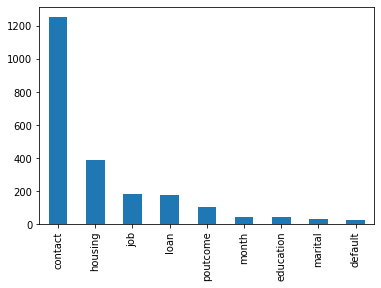

In [40]:
chi2_values.plot.bar()

In [41]:
# Three features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k = 3) 
X_kbest_features = chi2_features.fit_transform(X, Y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 9
Reduced feature number: 3


In [42]:
index = chi2_features.get_support(indices=True)
print(index)

[1 4 6]


In [43]:
X

,education,job,marital,default,housing,loan,contact,month,poutcome
0,3,4,1,0,1,0,2,8,3
1,2,9,2,0,1,0,2,8,3
2,2,2,1,0,1,1,2,8,3
3,2,1,1,0,1,0,2,8,3
4,2,11,2,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...
45206,3,9,1,0,0,0,0,9,3
45207,1,5,0,0,0,0,0,9,3
45208,2,5,1,0,0,0,0,9,2
45209,2,1,1,0,0,0,1,9,3


Features at index 1 , 4 and 6 are job , housing and contact respectively 

In [44]:
selected_features= ['job','housing','contact']

### b) Using Pearson Correlation Coefficient for Numeric Features vs Numeric Class

In [45]:
data=pd.read_csv("D:/FTI/Cohort 2 EDA/Lecture 4/Finance.csv")

In [46]:
df=data.copy()

In [47]:
data['y'].dtype

dtype('O')

In [48]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

we can convert yes and no into 1 and 0 and change the data type from object to integer 

In [49]:
data['y']=data['y'].apply(lambda x:0 if x=='no' else 1)

In [46]:
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [47]:
data['y'].dtype

dtype('int64')

In [48]:
cor_matrix=data.corr()

In [49]:
print(cor_matrix['y'].sort_values(ascending=False))

y           1.000000
duration    0.394521
pdays       0.103621
previous    0.093236
balance     0.052838
age         0.025155
day        -0.028348
campaign   -0.073172
Name: y, dtype: float64


In [50]:
cor_matrix

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


In [51]:
features_cor=(cor_matrix['y'].sort_values(ascending=False))

In [52]:
selected_num_features= ['duration','pdays','previous']

In [53]:
best_features=selected_features+(selected_num_features)

In [54]:
best_features

['job', 'housing', 'contact', 'duration', 'pdays', 'previous']

In [55]:

data2=pd.concat([data[best_features],data['y']],axis=1)

In [56]:
data2

,job,housing,contact,duration,pdays,previous,y
0,management,yes,unknown,261,-1,0,0
1,technician,yes,unknown,151,-1,0,0
2,entrepreneur,yes,unknown,76,-1,0,0
3,blue-collar,yes,unknown,92,-1,0,0
4,unknown,no,unknown,198,-1,0,0
...,...,...,...,...,...,...,...
45206,technician,no,cellular,977,-1,0,1
45207,retired,no,cellular,456,-1,0,1
45208,retired,no,cellular,1127,184,3,1
45209,blue-collar,no,telephone,508,-1,0,0


Remarks:
Feature Selection using filter methods is independant of the machine learning model we use. Whether our seletced features will work better or not depends on the performance of ML model we apply. 

### c) Feature Selection Using ANOVA ( Categorical ( features) vs Numeric Response)

In [102]:
data=pd.read_csv("D:/FTI/Cohort 2 EDA/Lecture 4/Finance.csv")

In [103]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [104]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Transformation 

ANOVA is used to select features if the target is numeric and features are categorical. I have gone through a number of resources and found in almost evey case where target variable was in the form of 1 and 0. so instead of doing experiment on some other staset, i have chosen the same financial data set for this experiment. We just need to transform the data in target from y and n to 1 and 0. This will cofirm whether ANOVA is giving us the same features as Chi-Square or not. Incase of a target having binary values , we can transform it to 1 and 0 and then use it as a numeric attribute . 

In [105]:
data['y']=data['y'].apply(lambda x:0 if x=='no' else 1)

In [106]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [107]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [108]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [109]:
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [110]:
ov=pd.crosstab(data['education'],data['y'])

In [111]:
ov

y,0,1
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


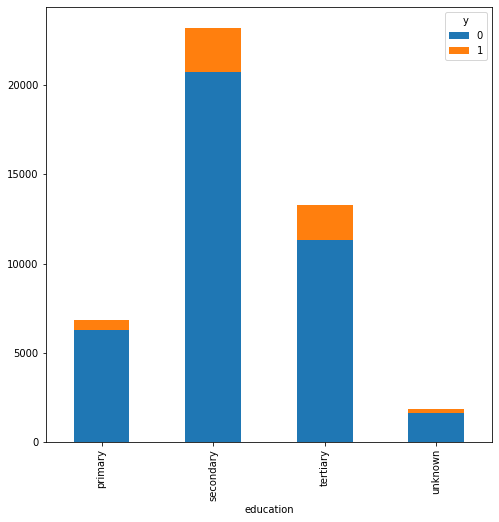

In [112]:
ov.plot(kind='bar', figsize=(8,8),stacked=True)

In [113]:
edu_frame=data[['education', 'y']]
edu_frame.head()

,education,y
0,tertiary,0
1,secondary,0
2,secondary,0
3,unknown,0
4,unknown,0


In [114]:
groups = edu_frame.groupby("education").groups

In [115]:
groups

{'primary': Int64Index([    8,    15,    17,    18,    22,    24,    45,    59,    62,
                73,
             ...
             45104, 45111, 45118, 45124, 45135, 45152, 45154, 45170, 45183,
             45207],
            dtype='int64', length=6851),
 'secondary': Int64Index([    1,     2,     9,    10,    11,    12,    14,    19,    20,
                23,
             ...
             45196, 45197, 45199, 45200, 45202, 45204, 45205, 45208, 45209,
             45210],
            dtype='int64', length=23202),
 'tertiary': Int64Index([    0,     5,     6,     7,    21,    26,    31,    34,    46,
                49,
             ...
             45173, 45185, 45191, 45192, 45193, 45194, 45198, 45201, 45203,
             45206],
            dtype='int64', length=13301),
 'unknown': Int64Index([    3,     4,    13,    16,    42,    44,    57,    58,    64,
                93,
             ...
             44983, 45022, 45055, 45098, 45109, 45129, 45141, 45150, 45158,
         

In [116]:
edu_class=edu_frame['y']

In [117]:
edu_class

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [118]:
primary = edu_class[groups["primary"]]
secondary = edu_class[groups["secondary"]]
tertiary = edu_class[groups["tertiary"]]
unknown = edu_class[groups["unknown"]]

In [119]:
primary

8        0
15       0
17       0
18       0
22       0
        ..
45152    0
45154    0
45170    0
45183    0
45207    1
Name: y, Length: 6851, dtype: int64

In [120]:
dfd=len(primary)-1+len(secondary)-1+len(tertiary)-1+len(unknown)-1
dfd

45207

In [191]:

f=stats.f_oneway(primary,secondary,tertiary ,unknown )

In [190]:
 import scipy.stats
critical_value=scipy.stats.f.ppf(q=1-0.05, dfn=3, dfd=45207)

In [194]:
 if (f[0] >critical_value):
        print(" Atleast on group is different , and the feature is releavant" )
else:
    print("There is no diffrenece between the means of different groups , and the feature is not releavant")

 Atleast on group is different , and the feature is releavant


Make a function so that we can test all the attributes by just calling the function.

### Selecting K Best Features Using ANOVA 

In [123]:
ordinal_list=['education']
data['education'] = data['education'].replace(['primary','secondary','tertiary','unknown'],[1,2,3,2])

In [124]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,2,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,2,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,2,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,1,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,2,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,2,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [125]:
nominal_list = []
for i in data.columns.tolist():
    if (data[i].dtype=='object') and (i not in ordinal_list):
        nominal_list.append(i)
print (nominal_list)        
print('Number of nominal features:', str(len(nominal_list)))


['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Number of nominal features: 8


In [126]:
ordinal_data=data[ordinal_list]
nominal_data=data[nominal_list]
categorical_data = pd.concat([ordinal_data,nominal_data], axis=1)

In [127]:
categorical_data

,education,job,marital,default,housing,loan,contact,month,poutcome
0,3,management,married,no,yes,no,unknown,may,unknown
1,2,technician,single,no,yes,no,unknown,may,unknown
2,2,entrepreneur,married,no,yes,yes,unknown,may,unknown
3,2,blue-collar,married,no,yes,no,unknown,may,unknown
4,2,unknown,single,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,3,technician,married,no,no,no,cellular,nov,unknown
45207,1,retired,divorced,no,no,no,cellular,nov,unknown
45208,2,retired,married,no,no,no,cellular,nov,success
45209,2,blue-collar,married,no,no,no,telephone,nov,unknown


In [128]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for column in nominal_list:
    categorical_data[column]=encoder.fit_transform(categorical_data[column])

In [129]:
categorical_data

,education,job,marital,default,housing,loan,contact,month,poutcome
0,3,4,1,0,1,0,2,8,3
1,2,9,2,0,1,0,2,8,3
2,2,2,1,0,1,1,2,8,3
3,2,1,1,0,1,0,2,8,3
4,2,11,2,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...
45206,3,9,1,0,0,0,0,9,3
45207,1,5,0,0,0,0,0,9,3
45208,2,5,1,0,0,0,0,9,2
45209,2,1,1,0,0,0,1,9,3


In [130]:
X=categorical_data

In [132]:
y=data['y']

In [181]:
col=X.columns
col

Index(['education', 'job', 'marital', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [141]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [164]:
f=f_classif(X,y)

In [167]:
f[0]

array([ 213.96297633,   74.04835143,   94.1500255 ,   22.73392322,
        892.95057646,  211.16739503, 1017.96593035,   27.08968938,
        275.5968724 ])

In [175]:
f[1]

array([2.42056523e-048, 7.86348864e-018, 3.07484749e-022, 1.86632653e-006,
       2.62192657e-194, 9.79365754e-048, 6.39604160e-221, 1.95078221e-007,
       1.04262910e-061])

In [170]:
p_values = pd.Series(f[1],index = X.columns)
p_values.sort_values(ascending = True , inplace = True)
fscore_values=pd.Series(f[0],index = X.columns)
fscore_values.sort_values(ascending = False , inplace = True)

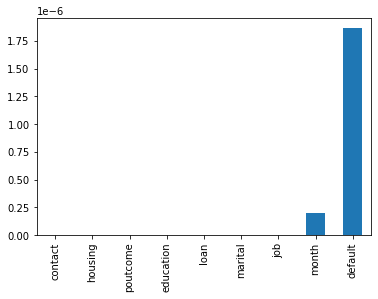

In [172]:
p_values.plot.bar()

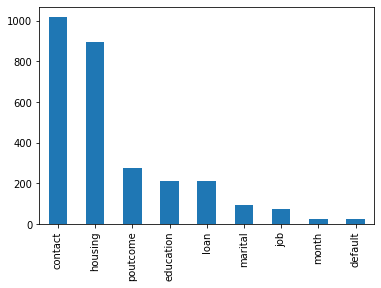

In [174]:
fscore_values.plot.bar()

In [182]:
def select_features(X_train,y_train,k,col):
    anova_features = SelectKBest(f_classif, k = k) 
    X_kbest_features = anova_features.fit_transform(X, Y) 
    index=anova_features.get_support(indices=True)
    return col[index]
    

In [184]:
select_features(X,y,4,col)

Index(['education', 'housing', 'contact', 'poutcome'], dtype='object')

In [185]:
columns=select_features(X,y,4,col)

In [186]:
df_selected_features=X[columns]

In [187]:
df_selected_features

,education,housing,contact,poutcome
0,3,1,2,3
1,2,1,2,3
2,2,1,2,3
3,2,1,2,3
4,2,0,2,3
...,...,...,...,...
45206,3,0,0,3
45207,1,0,0,3
45208,2,0,0,2
45209,2,0,1,3


In [188]:
data[columns]

,education,housing,contact,poutcome
0,3,yes,unknown,unknown
1,2,yes,unknown,unknown
2,2,yes,unknown,unknown
3,2,yes,unknown,unknown
4,2,no,unknown,unknown
...,...,...,...,...
45206,3,no,cellular,unknown
45207,1,no,cellular,unknown
45208,2,no,cellular,success
45209,2,no,telephone,unknown


### D) LDA ( Linear Discriminant Analysis)

https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2

# 6.Feature Seletion Based on Embeded Methods ( Random Forest) 

In [227]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [209]:
data=pd.read_csv("D:/FTI/Cohort 2 EDA/Lecture 4/Finance.csv")

In [210]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [214]:
data['y']=data['y'].apply(lambda x:0 if x=='no' else 1)

In [215]:
y=data['y']

In [216]:
data=data.drop('y',axis=1)

In [217]:
ordinal_list=['education']
data['education'] = data['education'].replace(['primary','secondary','tertiary','unknown'],[1,2,3,2])

In [218]:
nominal_list = []
for i in data.columns.tolist():
    if (data[i].dtype=='object') and (i not in ordinal_list):
        nominal_list.append(i)
print (nominal_list)        
print('Number of nominal features:', str(len(nominal_list)))

['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Number of nominal features: 8


In [219]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for column in nominal_list:
    data[column]=encoder.fit_transform(categorical_data[column])

In [220]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,3,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,2,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,2,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,2,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,2,0,1,0,0,2,5,8,198,1,-1,0,3


In [221]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [222]:
train,test = train_test_split(data)

In [223]:
len(train)

33908

In [224]:
len(test)

11303

In [225]:
X_train=data
Y_train=y

In [228]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [229]:
importances = clf.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.2930636173741779, 'duration'), (0.11119477109507034, 'balance'), (0.1046415367492501, 'age'), (0.08979365375653357, 'day'), (0.08713970680386957, 'month'), (0.051812102566191946, 'poutcome'), (0.04962279194969645, 'job'), (0.04859896554359561, 'pdays'), (0.0384153336886549, 'campaign'), (0.02674957132472083, 'housing'), (0.023058593706814384, 'previous'), (0.02258285932353153, 'education'), (0.02218296799329467, 'marital'), (0.019541014316243034, 'contact'), (0.009806127644431908, 'loan'), (0.0017963861639232579, 'default')]


In [230]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

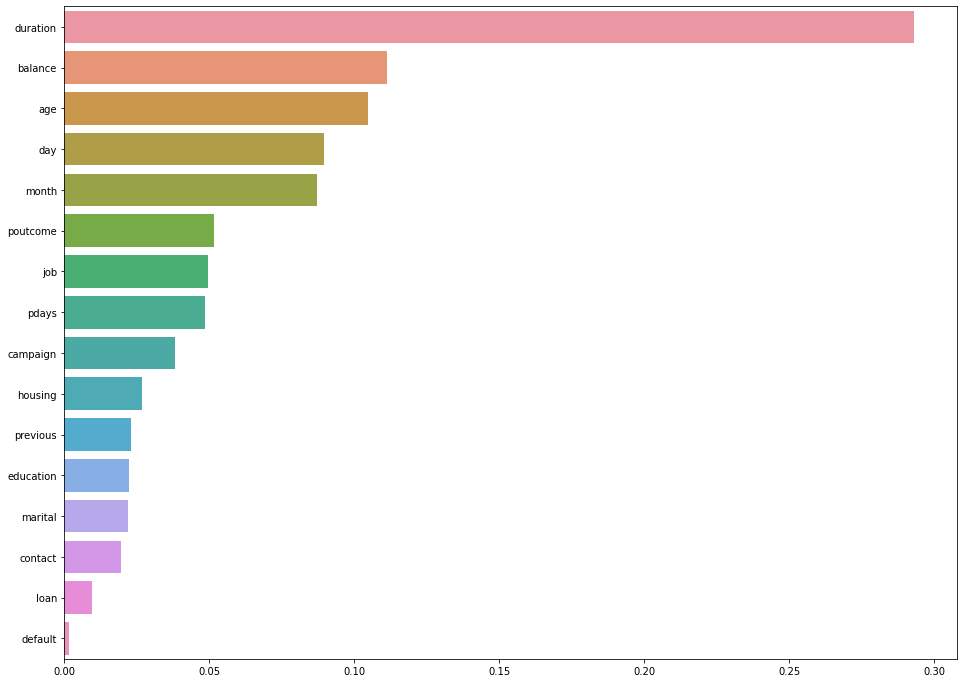

In [231]:
# Creating a bar plot
plt.figure(figsize=(16,12))
sns.barplot(x=feature_imp, y=feature_imp.index)